# An Analysis On Spinrate and Pitcher Performance

## Introduction

Ever since StatCast was introduced into the baseball world, tracking of miscelleaneous statistics and data have never been more plentiful. A particular statistic I want to explore is the spin-rate on fastballs for pitchers since 2015 (when StatCast kept track of spin-rates). In short, spin-rate is the amount of complete revolutions a baseball makes once it is released from a pitcher's hand until it reaches the catcher's glove. Spin-rate is measured in RPM's or revolutions per minute. 

The general consensus is that a fastball with a high spin-rate appears to have a rising effect on the hitter, and it crosses the plate a few inches higher than a fastball of equal velocity with a lower spin-rate. Conversely, a lower spin-rate on a changeup tends to create more movement.

It has also been speculated that many pitchers use foreign substances on the baseball to generate more spin on their pitches. Foreign substances such as pine-tar, sunscreen, or even a mixture of sticky stuff have been used as a source for competitive advantage. While this is not necessarily true of all pitchers, pitchers such as Trevor Bauer have even gone on record and admitted publicly that using sticky substances have proven to generate more spin on their pitches. Most other pitchers claim that having a tacky grip on a baseball is primarily for controlling their pitches and not for generating more spin. 

<img src="https://static01.nyt.com/images/2021/06/12/sports/12mlb-balldoctoring-toptest3/merlin_152020689_e3eae897-592c-4833-a1c4-f7b8e79ada6c-facebookJumbo.jpg" width="400" length = "400"/>

## The Goal

I wanted to take a closer look at the spin rates on fastballs for pitchers in MLB. In this notebook, my goal is to explore the wide range of visual analysis with the Pandas library and to comment on the spin-rate trends that may be apparent in MLB. Additionally, I want to specifically explore Gerrit Cole, a pitcher for the New York Yankees, and his performance metrics for the 2021 season. 

<img src="https://www.denverpost.com/wp-content/uploads/2021/06/AP20065783713273.jpg" width="400" length = "400" /> 


## The Dataset

The dataset I will be using is retrieved from [Baseball Savant](https://baseballsavant.mlb.com/) and can be filtered to provide the fastball and spin rate data relevant to purposes of this notebook. 

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
%matplotlib inline


## Upload data as a dataframe

In [2]:
df_pitching = pd.read_csv('pitching_stats.csv')
df_pitching.head(5)

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_ab,p_total_hits,...,breaking_avg_break,breaking_range_speed,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break,offspeed_range_speed,Unnamed: 49
0,Wainwright,Adam,425794,2021,40,32,206.1,828,765,168,...,22.2,1.6,6.4,82.7,1715.0,-13.8,-32.1,16.0,1.6,NaN
1,Greinke,Zack,425844,2021,38,30,171.0,697,652,164,...,12.4,7.1,22.4,86.4,1594.0,-12.8,-32.1,13.7,1.2,NaN
2,Morton,Charlie,450203,2021,38,33,185.2,756,669,136,...,19.5,1.3,5.3,86.4,2100.0,-18.0,-33.8,18.4,1.4,NaN
3,Scherzer,Max,453286,2021,37,30,179.1,693,644,119,...,9.2,4.9,14.9,85.0,1446.0,-15.2,-33.9,15.9,1.3,NaN
4,Miley,Wade,489119,2021,35,28,163.0,690,627,166,...,13.5,2.8,27.4,81.9,1807.0,14.8,-33.9,16.4,1.5,NaN


In [3]:
#what are my columns?
df_pitching.columns

Index(['last_name', ' first_name', 'player_id', 'year', 'player_age', 'p_game',
       'p_formatted_ip', 'p_total_pa', 'p_ab', 'p_total_hits', 'p_single',
       'p_double', 'p_triple', 'p_home_run', 'p_strikeout', 'p_walk',
       'p_k_percent', 'p_bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'on_base_plus_slg', 'p_earned_run', 'p_run', 'p_win',
       'p_loss', 'p_era', 'p_opp_batting_avg', 'n_fastball_formatted',
       'fastball_avg_speed', 'fastball_avg_spin', 'fastball_avg_break_x',
       'fastball_avg_break_z', 'fastball_avg_break', 'fastball_range_speed',
       'n_breaking_formatted', 'breaking_avg_speed', 'breaking_avg_spin',
       'breaking_avg_break_x', 'breaking_avg_break_z', 'breaking_avg_break',
       'breaking_range_speed', 'n_offspeed_formatted', 'offspeed_avg_speed',
       'offspeed_avg_spin', 'offspeed_avg_break_x', 'offspeed_avg_break_z',
       'offspeed_avg_break', 'offspeed_range_speed', 'Unnamed: 49'],
      dtype='object')

In [4]:
#what are the data types in my dataframe?
df_pitching.dtypes

last_name                object
 first_name              object
player_id                 int64
year                      int64
player_age                int64
p_game                    int64
p_formatted_ip          float64
p_total_pa                int64
p_ab                      int64
p_total_hits              int64
p_single                  int64
p_double                  int64
p_triple                  int64
p_home_run                int64
p_strikeout               int64
p_walk                    int64
p_k_percent             float64
p_bb_percent            float64
batting_avg             float64
slg_percent             float64
on_base_percent         float64
on_base_plus_slg        float64
p_earned_run              int64
p_run                     int64
p_win                     int64
p_loss                    int64
p_era                   float64
p_opp_batting_avg       float64
n_fastball_formatted    float64
fastball_avg_speed      float64
fastball_avg_spin         int64
fastball

In [5]:
#show all column names (currently truncated)
pd.set_option('display.max_columns', None)

In [6]:
df_pitching

,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_ab,p_total_hits,p_single,p_double,p_triple,p_home_run,p_strikeout,p_walk,p_k_percent,p_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,p_earned_run,p_run,p_win,p_loss,p_era,p_opp_batting_avg,n_fastball_formatted,fastball_avg_speed,fastball_avg_spin,fastball_avg_break_x,fastball_avg_break_z,fastball_avg_break,fastball_range_speed,n_breaking_formatted,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,breaking_avg_break,breaking_range_speed,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break,offspeed_range_speed,Unnamed: 49
0,Wainwright,Adam,425794,2021,40,32,206.1,828,765,168,111,34,2,21,174,50,21.0,6.0,0.220,0.352,0.274,0.626,70,72,17,7,3.05,0.220,59.7,87.5,2295,-4.0,-25.1,14.3,2.7,33.8,73.5,2839,16.6,-66.3,22.2,1.6,6.4,82.7,1715.0,-13.8,-32.1,16.0,1.6,NaN
1,Greinke,Zack,425844,2021,38,30,171.0,697,652,164,105,29,0,30,120,36,17.2,5.2,0.252,0.434,0.290,0.724,79,82,11,6,4.16,0.252,45.9,89.0,2224,-2.8,-18.6,16.7,1.3,31.8,77.2,2361,9.7,-51.0,12.4,7.1,22.4,86.4,1594.0,-12.8,-32.1,13.7,1.2,NaN
2,Morton,Charlie,450203,2021,38,33,185.2,756,669,136,100,17,3,16,216,58,28.6,7.7,0.203,0.309,0.279,0.589,69,77,14,6,3.34,0.203,58.0,94.1,2301,-11.7,-21.3,16.3,3.4,36.7,80.6,3053,16.6,-52.5,19.5,1.3,5.3,86.4,2100.0,-18.0,-33.8,18.4,1.4,NaN
3,Scherzer,Max,453286,2021,37,30,179.1,693,644,119,73,21,2,23,236,36,34.1,5.2,0.185,0.331,0.238,0.569,49,53,15,4,2.46,0.185,55.7,93.6,2442,-9.0,-16.4,17.7,2.2,29.4,82.9,2403,6.4,-39.7,9.2,4.9,14.9,85.0,1446.0,-15.2,-33.9,15.9,1.3,NaN
4,Miley,Wade,489119,2021,35,28,163.0,690,627,166,112,35,2,17,125,50,18.1,7.2,0.265,0.408,0.317,0.726,61,64,12,7,3.37,0.265,64.1,86.6,2263,-1.9,-26.9,10.7,2.7,8.6,77.4,2343,-11.3,-47.0,13.5,2.8,27.4,81.9,1807.0,14.8,-33.9,16.4,1.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Fernandez,Jose,605228,2016,24,29,182.1,737,664,149,104,29,3,13,253,55,34.3,7.5,0.224,0.336,0.285,0.621,58,63,16,8,2.86,0.224,53.9,95.8,2431,-10.7,-12.3,21.3,2.0,33.6,84.4,2379,9.7,-35.8,10.7,1.8,12.5,88.8,1552.0,-16.2,-27.2,18.3,1.9,NaN
403,Finnegan,Brandon,605232,2016,23,31,172.0,734,636,150,95,21,5,29,145,84,19.8,11.4,0.236,0.421,0.324,0.746,76,86,10,11,3.98,0.236,65.2,92.3,2187,10.0,-14.8,19.6,1.7,23.4,84.0,2142,-2.9,-35.7,6.6,2.2,11.5,85.5,1646.0,11.2,-25.0,17.3,1.9,NaN
404,Rodon,Carlos,607074,2016,24,28,165.0,715,644,176,123,28,2,23,168,54,23.5,7.6,0.273,0.430,0.330,0.760,74,82,9,10,4.04,0.273,63.8,94.0,2178,10.7,-16.0,19.2,2.4,25.6,87.2,2315,-6.5,-31.3,9.7,2.8,10.6,84.1,1610.0,14.3,-32.5,15.8,2.0,NaN
405,Graveman,Kendall,608665,2016,26,31,186.0,786,723,196,138,34,2,22,108,47,13.7,6.0,0.271,0.415,0.318,0.733,85,87,10,11,4.11,0.271,86.2,92.1,2301,-9.9,-21.7,16.7,2.9,6.4,80.2,2320,10.2,-41.5,10.8,2.2,7.3,85.6,1700.0,-12.8,-30.4,15.0,1.4,NaN


In [7]:
# Let's look at the dimension of the data
print(f'Data contains {df_pitching.shape[0]} records and {df_pitching.shape[1]} columns.')

Data contains 407 records and 50 columns.


In [8]:
# loop through the columns and check the missing values
for col in df_pitching.columns:
    pct_missing = df_pitching[col].isnull().mean()
    print(f'{col} - {pct_missing :.1%}')

last_name - 0.0%
 first_name - 0.0%
player_id - 0.0%
year - 0.0%
player_age - 0.0%
p_game - 0.0%
p_formatted_ip - 0.0%
p_total_pa - 0.0%
p_ab - 0.0%
p_total_hits - 0.0%
p_single - 0.0%
p_double - 0.0%
p_triple - 0.0%
p_home_run - 0.0%
p_strikeout - 0.0%
p_walk - 0.0%
p_k_percent - 0.0%
p_bb_percent - 0.0%
batting_avg - 0.0%
slg_percent - 0.0%
on_base_percent - 0.0%
on_base_plus_slg - 0.0%
p_earned_run - 0.0%
p_run - 0.0%
p_win - 0.0%
p_loss - 0.0%
p_era - 0.0%
p_opp_batting_avg - 0.0%
n_fastball_formatted - 0.0%
fastball_avg_speed - 0.0%
fastball_avg_spin - 0.0%
fastball_avg_break_x - 0.0%
fastball_avg_break_z - 19.2%
fastball_avg_break - 0.0%
fastball_range_speed - 0.0%
n_breaking_formatted - 0.0%
breaking_avg_speed - 0.0%
breaking_avg_spin - 0.0%
breaking_avg_break_x - 0.0%
breaking_avg_break_z - 19.2%
breaking_avg_break - 0.0%
breaking_range_speed - 0.0%
n_offspeed_formatted - 1.7%
offspeed_avg_speed - 1.7%
offspeed_avg_spin - 1.7%
offspeed_avg_break_x - 1.7%
offspeed_avg_break_z - 

There are some missing data in the dataset, however, this is likely due to pitching data not available for some pitchers since some pitchers may not throw pitches that may be considered offspeed. 

Lets get a better understanding of the data by describing the dataset

In [9]:
df_pitching.describe().transpose() #Generate descriptive statistics 

,count,mean,std,min,25%,50%,75%,max
player_id,407.0,526561.073710,81128.218606,112526.000,461829.0000,542881.000,593119.0000,669456.000
year,407.0,2017.552826,1.951767,2015.000,2016.0000,2017.000,2019.0000,2021.000
player_age,407.0,29.454545,3.877721,22.000,27.0000,29.000,32.0000,43.000
p_game,407.0,29.619165,6.123517,10.000,30.0000,32.000,33.0000,42.000
p_formatted_ip,407.0,174.946437,38.352999,60.100,170.2000,181.100,197.1000,232.200
p_total_pa,407.0,728.538084,157.542669,248.000,713.5000,762.000,815.5000,951.000
p_ab,407.0,662.977887,144.156428,229.000,646.5000,691.000,742.5000,879.000
p_total_hits,407.0,161.619165,40.157755,39.000,150.0000,170.000,186.0000,240.000
p_single,407.0,105.429975,28.145547,25.000,94.0000,111.000,123.5000,160.000
p_double,407.0,31.567568,9.536279,4.000,27.0000,33.000,37.0000,54.000


## Variable Column Names

For more information on other baseball variable names, the following link provides descriptions of variable names: [Baseball Savant Statcast Search CSV Documentation](https://baseballsavant.mlb.com/csv-docs).

The above table describes, in general, a couple of interesting things. 

- First, we confirm that the data was taken and tracked from 2015 to 2021 and that during this span, 407 players (count) were recorded for fastball data. This includes players who may have played in multiple years ie. (2017, 2018, 2019, etc). <p>

    
- During this timeframe, the maximum average spin rate for a fastball in one particular year was 2,817 rpm while the minimum average spin rate was 1806 rpm. Conversly, the average fastest fastball was 98.6 mph while the minimum was 82.3 mph. 

In [10]:
len(df_pitching) #confirm the amount of players tracked from 2015-2021
print('There are', len(df_pitching), 'players in this dataset')

There are 407 players in this dataset


## Data Cleaning

### Renaming Columns

- rename the columns 'n_fastball_formatted', 'n_breaking_formatted', 'n_offspeed_formatted' to more understandable column names. Each column refers to the percentage of the pitch type thrown that year by the pitcher. 

In [11]:
df_pitching.rename(columns = {'n_fastball_formatted': 'fastball_percentage', 
                              'n_breaking_formatted': 'breaking_percentage', 
                              'n_offspeed_formatted': 'offspeed_percentage'}, inplace = True)
df_pitching.columns


Index(['last_name', ' first_name', 'player_id', 'year', 'player_age', 'p_game',
       'p_formatted_ip', 'p_total_pa', 'p_ab', 'p_total_hits', 'p_single',
       'p_double', 'p_triple', 'p_home_run', 'p_strikeout', 'p_walk',
       'p_k_percent', 'p_bb_percent', 'batting_avg', 'slg_percent',
       'on_base_percent', 'on_base_plus_slg', 'p_earned_run', 'p_run', 'p_win',
       'p_loss', 'p_era', 'p_opp_batting_avg', 'fastball_percentage',
       'fastball_avg_speed', 'fastball_avg_spin', 'fastball_avg_break_x',
       'fastball_avg_break_z', 'fastball_avg_break', 'fastball_range_speed',
       'breaking_percentage', 'breaking_avg_speed', 'breaking_avg_spin',
       'breaking_avg_break_x', 'breaking_avg_break_z', 'breaking_avg_break',
       'breaking_range_speed', 'offspeed_percentage', 'offspeed_avg_speed',
       'offspeed_avg_spin', 'offspeed_avg_break_x', 'offspeed_avg_break_z',
       'offspeed_avg_break', 'offspeed_range_speed', 'Unnamed: 49'],
      dtype='object')

# Creating New DataFrames

The amount of metrics that are available in the current pitching dataframe is quite lengthy as there are 50 total columns in the dataframe. In an effort to make things easier to read and understand, I will create a new dataframe of just the Statcast data which is data that is outside of the traditional baseball statistic. This new dataframe will contain solely Statcast data related to pitching spinrates and measurements of break. 

In [12]:
df_statcast = df_pitching[['last_name', ' first_name', 'fastball_percentage',
       'fastball_avg_speed', 'fastball_avg_spin', 'fastball_avg_break_x',
       'fastball_avg_break_z', 'fastball_avg_break', 'fastball_range_speed',
       'breaking_percentage', 'breaking_avg_speed', 'breaking_avg_spin',
       'breaking_avg_break_x', 'breaking_avg_break_z', 'breaking_avg_break',
       'breaking_range_speed', 'offspeed_percentage', 'offspeed_avg_speed',
       'offspeed_avg_spin', 'offspeed_avg_break_x', 'offspeed_avg_break_z',
       'offspeed_avg_break', 'offspeed_range_speed']].copy()

df_statcast


,last_name,first_name,fastball_percentage,fastball_avg_speed,fastball_avg_spin,fastball_avg_break_x,fastball_avg_break_z,fastball_avg_break,fastball_range_speed,breaking_percentage,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,breaking_avg_break,breaking_range_speed,offspeed_percentage,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break,offspeed_range_speed
0,Wainwright,Adam,59.7,87.5,2295,-4.0,-25.1,14.3,2.7,33.8,73.5,2839,16.6,-66.3,22.2,1.6,6.4,82.7,1715.0,-13.8,-32.1,16.0,1.6
1,Greinke,Zack,45.9,89.0,2224,-2.8,-18.6,16.7,1.3,31.8,77.2,2361,9.7,-51.0,12.4,7.1,22.4,86.4,1594.0,-12.8,-32.1,13.7,1.2
2,Morton,Charlie,58.0,94.1,2301,-11.7,-21.3,16.3,3.4,36.7,80.6,3053,16.6,-52.5,19.5,1.3,5.3,86.4,2100.0,-18.0,-33.8,18.4,1.4
3,Scherzer,Max,55.7,93.6,2442,-9.0,-16.4,17.7,2.2,29.4,82.9,2403,6.4,-39.7,9.2,4.9,14.9,85.0,1446.0,-15.2,-33.9,15.9,1.3
4,Miley,Wade,64.1,86.6,2263,-1.9,-26.9,10.7,2.7,8.6,77.4,2343,-11.3,-47.0,13.5,2.8,27.4,81.9,1807.0,14.8,-33.9,16.4,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Fernandez,Jose,53.9,95.8,2431,-10.7,-12.3,21.3,2.0,33.6,84.4,2379,9.7,-35.8,10.7,1.8,12.5,88.8,1552.0,-16.2,-27.2,18.3,1.9
403,Finnegan,Brandon,65.2,92.3,2187,10.0,-14.8,19.6,1.7,23.4,84.0,2142,-2.9,-35.7,6.6,2.2,11.5,85.5,1646.0,11.2,-25.0,17.3,1.9
404,Rodon,Carlos,63.8,94.0,2178,10.7,-16.0,19.2,2.4,25.6,87.2,2315,-6.5,-31.3,9.7,2.8,10.6,84.1,1610.0,14.3,-32.5,15.8,2.0
405,Graveman,Kendall,86.2,92.1,2301,-9.9,-21.7,16.7,2.9,6.4,80.2,2320,10.2,-41.5,10.8,2.2,7.3,85.6,1700.0,-12.8,-30.4,15.0,1.4


## Analysis

In order to visualize some of the data I have already gathered, I will import the Seaborn data visualization package to help. 

The Seaborn method `sns.pairplot()` is very useful tool that can give a very broad visualization of the data we have. A scatter matrix is a matrix of scatterplots, visualizing up to every pair of columns from your data as a scatterplot. The scatter matrix maps pairs of columns to canvases. These visualizations are useful enough that it is implemented in seaborn as its own function. 

In [13]:
#which statistics are most closely correlated?
correlation_statcast = df_statcast.corr()
correlation_statcast

,fastball_percentage,fastball_avg_speed,fastball_avg_spin,fastball_avg_break_x,fastball_avg_break_z,fastball_avg_break,fastball_range_speed,breaking_percentage,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,breaking_avg_break,breaking_range_speed,offspeed_percentage,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break,offspeed_range_speed
fastball_percentage,1.000000,-0.091921,0.045819,0.151486,-0.219763,-0.190205,0.434656,-0.739108,-0.246274,-0.009085,-0.061297,-0.261585,0.060115,-0.226291,-0.235889,-0.123576,0.044810,0.121052,0.064596,0.121341,0.071184
fastball_avg_speed,-0.091921,1.000000,0.273212,-0.254109,0.657317,0.283031,-0.225788,0.175195,0.769344,0.092687,0.113965,0.577682,-0.315610,0.125716,-0.188516,0.714734,-0.008865,-0.289465,0.430609,0.033668,0.123782
fastball_avg_spin,0.045819,0.273212,1.000000,-0.049139,0.311781,0.017264,0.180399,0.095814,0.260238,0.433094,0.157576,0.148409,0.023852,0.171866,-0.229586,0.270427,0.191463,-0.163666,0.278480,0.071665,0.060053
fastball_avg_break_x,0.151486,-0.254109,-0.049139,1.000000,-0.079222,-0.140678,0.132621,-0.186427,-0.293484,-0.145585,-0.671890,-0.213088,-0.015673,-0.136917,0.092156,-0.253740,0.082599,0.921603,0.038067,0.100488,0.032373
fastball_avg_break_z,-0.219763,0.657317,0.311781,-0.079222,1.000000,0.684006,-0.315401,0.228430,0.486727,-0.067065,-0.036721,0.403099,-0.272367,0.301335,-0.070885,0.353916,-0.035114,-0.120336,0.596482,0.257020,0.035798
fastball_avg_break,-0.190205,0.283031,0.017264,-0.140678,0.684006,1.000000,-0.302528,0.100679,0.192792,-0.276041,-0.066840,0.213176,-0.233431,0.232667,0.099624,0.012950,0.032516,-0.086044,0.320451,0.506577,-0.001238
fastball_range_speed,0.434656,-0.225788,0.180399,0.132621,-0.315401,-0.302528,1.000000,-0.331785,-0.315396,0.019142,0.071685,-0.307552,0.243516,-0.189691,-0.068686,-0.072173,-0.030167,0.050013,-0.052640,-0.003608,0.220453
breaking_percentage,-0.739108,0.175195,0.095814,-0.186427,0.228430,0.100679,-0.331785,1.000000,0.363225,0.037471,0.157912,0.323374,-0.033572,0.311474,-0.537000,0.327855,-0.014045,-0.219786,0.204958,-0.081716,-0.013807
breaking_avg_speed,-0.246274,0.769344,0.260238,-0.293484,0.486727,0.192792,-0.315396,0.363225,1.000000,-0.038853,0.100914,0.874091,-0.514968,0.212024,-0.240673,0.633846,-0.005019,-0.297640,0.357652,-0.053177,0.112019
breaking_avg_spin,-0.009085,0.092687,0.433094,-0.145585,-0.067065,-0.276041,0.019142,0.037471,-0.038853,1.000000,0.333171,-0.300394,0.497423,-0.046173,-0.104499,0.108150,0.188798,-0.227283,-0.027690,-0.105407,-0.109238


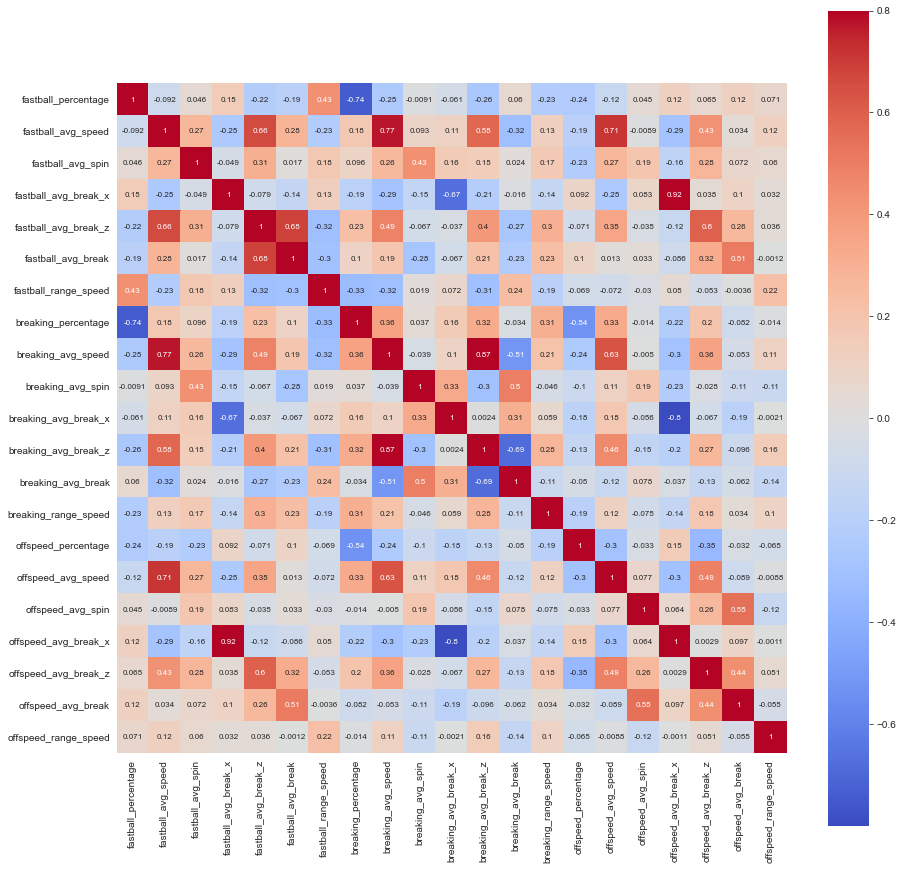

In [14]:
#correlation matrix
corrmat = df_statcast.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, cmap = 'coolwarm', vmax=.8, square=True,  annot = True, annot_kws={"size":8});

### Plotting Average Fastball Spin-Rate VS. Average Fastball Speed

Since there are many statistics to consider, I will specifically examine a pitcher's spinrate against other performance metrics.  

Lets take a closer look at average spinrate against the average fastball speed. There seems to be a positive correlation between the two variables. I have typically expected that if you threw a pitch faster, it will therefore spin faster. However, can this assumption be confirmed?

<Figure size 1800x1440 with 0 Axes>

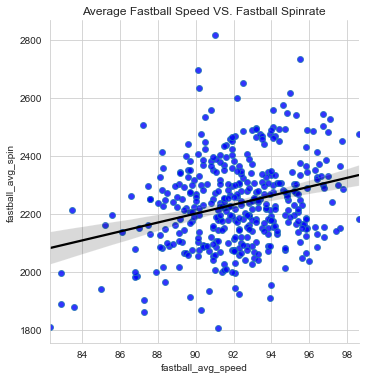

In [15]:
#plot fastball avg speed vs fastball avg spin
plt.figure(figsize = (25,20))
sns.lmplot(data=df_pitching, 
           x='fastball_avg_speed', 
           y= 'fastball_avg_spin',
           scatter_kws = {'facecolors':'blue'},
           line_kws={'color': 'black'}).set(title='Average Fastball Speed VS. Fastball Spinrate')


The above lineplot indicates that there is a slightly positive correlation between average fastball speed and average fastball spinrates among all pitchers. What is the strength of correlation exactly?

In [16]:
#determine correlation between variables
print('The correlation between average fastball speed and spinrate is',
       df_pitching['fastball_avg_speed'].corr(df_pitching['fastball_avg_spin']))
    

The correlation between average fastball speed and spinrate is 0.27321173574605


Considering that the correlation is only 0.273, there is actually not a very strong correlation between fastball pitch speed and spinrate. Therefore, it is not necessarily true that throwing faster will induce a greater spinrate on the baseball. 

Lets take a look at breaking and off-speed pitches. 

### Plotting Average Breaking Ball Spin-Rate VS. Average Breaking Ball Speed

<Figure size 1800x1440 with 0 Axes>

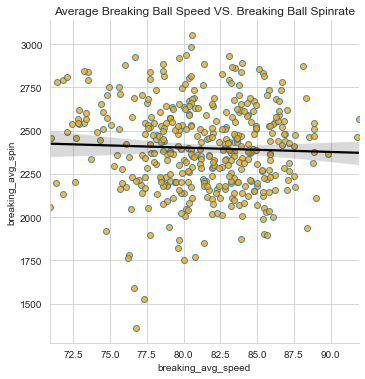

In [17]:
#plot breaking avg speed vs breaking avg spin
plt.figure(figsize = (25,20))
sns.lmplot(data=df_pitching, x='breaking_avg_speed', 
           y= 'breaking_avg_spin',
           scatter_kws = {'facecolors':'orange'},
           line_kws={'color': 'black'}).set(title='Average Breaking Ball Speed VS. Breaking Ball Spinrate')


In [18]:
#determine correlation between variables
print('The correlation between average breaking ball speed and spinrate is',
       df_pitching['breaking_avg_speed'].corr(df_pitching['breaking_avg_spin']))
    

The correlation between average breaking ball speed and spinrate is -0.03885270769285666


There is a slightly negative correlation between average breaking ball speed and spinrate. Similarly, there is not a strong correlation between speed and spinrate of breaking balls. 

### Plotting Average Offspeed Spin-Rate VS. Average Offspeed Speed

<Figure size 1800x1440 with 0 Axes>

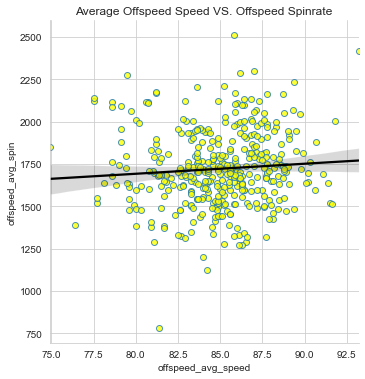

In [19]:
#plot offspeed avg speed vs offspeed avg spin
plt.figure(figsize = (25,20))
sns.lmplot(data=df_pitching, x='offspeed_avg_speed', 
           y= 'offspeed_avg_spin',
          scatter_kws = {'facecolors':'yellow'},
           line_kws={'color': 'black'}).set(title='Average Offspeed Speed VS. Offspeed Spinrate')


In [20]:
#determine correlation between variables
print('The correlation between average offspeed speed and spinrate is',
       df_pitching['offspeed_avg_speed'].corr(df_pitching['offspeed_avg_spin']))
    

The correlation between average offspeed speed and spinrate is 0.07701780879391115


There is a slightly positive correlation between average breaking ball speed and spinrate. 

## Pitcher Control 

Pitchers also claim that the use of sticky substances does not necessarily mean they want to gain a competitive advantage by generating greater spinrates on their ptiches. Because a baseball is naturally slick or smooth to the touch, pitchers argue that having a tacky surface on the baseball helps with their pitch control. 

Lets explore whether this has been true for the 2021 season by measuring walks and hit by pitches. The following is a set of data gathering all pitchers and their respective walks and hit by pitch statistics from 2015 - 2021. 

### 2021 Walk Totals

In [21]:
#create a new dataframe of pitcher's walk and hbp totals
df_bb_hbp = pd.read_csv('bb_hbp.csv')
df_bb_hbp.head(5)

,last_name,first_name,player_id,year,p_walk,p_hit_by_pitch,Unnamed: 6
0,Colon,Bartolo,112526,2016,32,3,NaN
1,Grilli,Jason,276351,2016,32,2,NaN
2,Benoit,Joaquin,276542,2016,24,1,NaN
3,Belisle,Matt,279571,2016,7,1,NaN
4,Sabathia,CC,282332,2016,65,9,NaN


In [22]:
#drop unnamed column
df_bb_hbp.drop(columns=['Unnamed: 6'])

,last_name,first_name,player_id,year,p_walk,p_hit_by_pitch
0,Colon,Bartolo,112526,2016,32,3
1,Grilli,Jason,276351,2016,32,2
2,Benoit,Joaquin,276542,2016,24,1
3,Belisle,Matt,279571,2016,7,1
4,Sabathia,CC,282332,2016,65,9
...,...,...,...,...,...,...
4149,Meisinger,Ryan,664682,2018,10,0
4150,Burnes,Corbin,669203,2018,11,3
4151,Bieber,Shane,669456,2018,23,2
4152,Richards,Trevor,670950,2018,54,5


In [23]:
#group total walks per year
df_bb_hbp.groupby("year")["p_walk"].sum()

year
2015    13792
2016    14723
2017    15404
2018    15207
2019    15360
2020     5330
2021    15268
Name: p_walk, dtype: int64

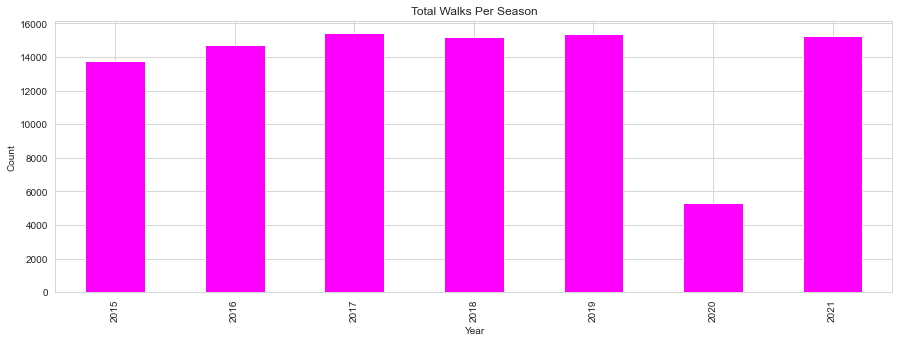

In [24]:
#plot total count of walks per season
df_bb_hbp.groupby(df_bb_hbp['year']).sum()['p_walk'] \
    .plot(kind='bar', 
          figsize=(15, 5), 
          title='Total Walks Per Season', 
          xlabel = 'Year', ylabel = 'Count', 
          color = 'magenta')

plt.show()

There has been a gradual rise in total walks per season. Notably in 2020, we see that the amount of total walks is significantly less than the previous seasons. However, 2020 was a shortened season due to the pandemic. 2021 saw a total of walks roughly equivalent to the 2017-2019 seasons. There is no strong indication that the crackdown on sticky substances has generated more or less walks. 

However, there is an indication that the game of baseball has seen a greater tendency for batters to walk. While not the most action packed part of the game, the increase in walks per season is a philosophical strategy encouraged by teams in baseball to get on base and win games.  

This has been an issue in baseball when addressing the pace of play and action during a game. 

### 2021 Hit By Pitch Totals

In [25]:
#group by year and sum of hbp
df_bb_hbp.groupby("year")["p_hit_by_pitch"].sum()

year
2015    1564
2016    1615
2017    1716
2018    1856
2019    1924
2020     729
2021    2016
Name: p_hit_by_pitch, dtype: int64

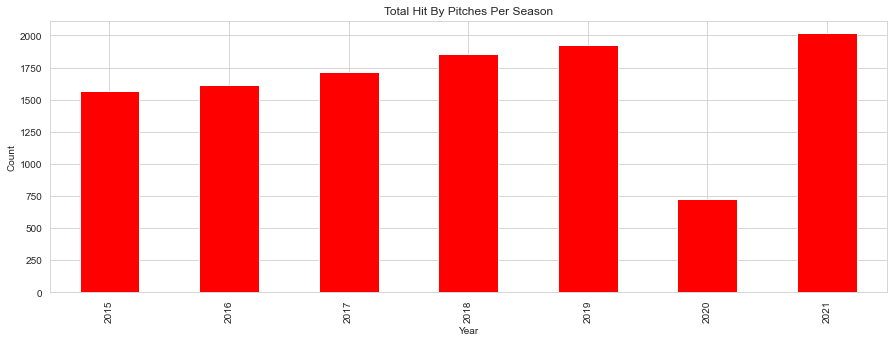

In [26]:
#plot total count of walks per season
df_bb_hbp.groupby(df_bb_hbp['year']).sum()['p_hit_by_pitch'] \
    .plot(kind='bar', 
          figsize=(15, 5), 
          title='Total Hit By Pitches Per Season', 
          xlabel = 'Year', ylabel = 'Count', 
          color = 'red')

plt.show()

While there is no strong indiciation that pitchers are necessarily walking more batters, there is a noticeable rise in hit by pitches since 2015. 2021 in particular, saw the greatest amount of hit by pitches (2016 hbp) since 2015. 

This can be partially explained by pitchers who are throwing harder than ever; pitchers may therefore be more dependent on the grip they have on the baseball. The rise in hit by pitches can be partially attributed with the crackdown on sticky substances and rise of hard throwers in baseball. 

## Gerrit Cole Analysis

No other pitcher in baseball received more attention regarding the ban on sticky substances than Gerrit Cole. Cole is a particular pitcher who is speculated to have been using foreign substances on baseballs to help get a better grip and improve his spin rate on pitches. 

<img src="https://www.si.com/.image/t_share/MTgyMDU0Mjk1NTQ4NDcwNDAz/gerrit-cole-sticky-stuff-check.jpg" width=400 height=400 />

I will now isolate data specifically for Gerrit Cole and take a deeper dive into his performance metrics when it comes to his fastballs. 

### Filter out data for Gerrit Cole

In [27]:
#create a filter with a series of true/false values where true is 'Cole' for 'Last Name'
cole = (df_pitching['last_name'] == 'Cole') 

#create new dataframe that meets filter criteria
df_cole = df_pitching.loc[cole] 

df_cole


,last_name,first_name,player_id,year,player_age,p_game,p_formatted_ip,p_total_pa,p_ab,p_total_hits,p_single,p_double,p_triple,p_home_run,p_strikeout,p_walk,p_k_percent,p_bb_percent,batting_avg,slg_percent,on_base_percent,on_base_plus_slg,p_earned_run,p_run,p_win,p_loss,p_era,p_opp_batting_avg,fastball_percentage,fastball_avg_speed,fastball_avg_spin,fastball_avg_break_x,fastball_avg_break_z,fastball_avg_break,fastball_range_speed,breaking_percentage,breaking_avg_speed,breaking_avg_spin,breaking_avg_break_x,breaking_avg_break_z,breaking_avg_break,breaking_range_speed,offspeed_percentage,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break,offspeed_range_speed,Unnamed: 49
8,Cole,Gerrit,543037,2021,31,30,181.1,726,677,151,99,27,1,24,243,41,33.5,5.6,0.223,0.372,0.267,0.639,65,69,16,8,3.23,0.223,48.0,97.7,2451,-12.1,-11.0,21.7,1.4,37.9,86.3,2683,7.5,-41.5,10.2,3.2,14.2,89.8,1719.0,-15.8,-24.0,18.9,1.5,NaN
74,Cole,Gerrit,543037,2017,27,33,203.0,849,784,199,126,36,6,31,196,55,23.1,6.5,0.254,0.434,0.304,0.738,96,98,12,12,4.26,0.254,60.2,95.8,2149,-14.4,-15.3,21.1,1.6,29.5,84.9,2528,6.3,-39.6,9.3,4.6,10.3,88.5,1631.0,-16.5,-26.2,19.3,1.6,NaN
120,Cole,Gerrit,543037,2019,29,33,212.1,817,762,142,82,30,1,29,326,48,39.9,5.9,0.186,0.343,0.236,0.579,59,66,20,5,2.50,0.186,54.0,97.1,2529,-11.6,-11.0,21.7,1.6,38.6,86.6,2736,7.6,-41.3,11.2,4.0,7.4,88.6,1870.0,-15.3,-22.9,19.5,1.5,NaN
180,Cole,Gerrit,543037,2018,28,32,200.1,799,723,143,86,36,2,19,276,64,34.5,8.0,0.198,0.332,0.268,0.600,64,68,15,5,2.88,0.198,56.4,96.5,2372,-11.6,-12.9,20.6,1.4,39.2,85.7,2706,8.7,-42.0,11.9,3.9,4.5,87.7,1667.0,-14.5,-24.5,18.5,1.7,NaN
274,Cole,Gerrit,543037,2015,25,32,208.0,832,765,183,136,31,5,11,202,44,24.3,5.3,0.239,0.336,0.285,0.621,60,71,19,8,2.60,0.239,67.0,96.3,2154,-13.9,NaN,20.5,1.7,29.4,86.2,2160,6.0,NaN,7.5,3.3,3.6,88.8,1708.0,-14.2,NaN,17.9,1.5,NaN
303,Cole,Gerrit,543037,2020,30,12,73.0,288,269,53,25,14,0,14,94,17,32.6,5.9,0.197,0.405,0.250,0.655,23,27,7,3,2.84,0.197,52.8,96.7,2505,-12.2,-11.5,21.7,1.4,41.6,86.5,2672,6.9,-39.2,10.1,3.3,5.6,88.3,1750.0,-15.5,-24.5,18.9,1.6,NaN


Great, now I have isolated the data I need for Gerrit Cole. Note, there is missing data from the year 2016 (specific to Gerrit Cole) and is not available on Baseball Savant. It is unclear why 2016 performance metrics for Cole was not collected but we will ignore the missing data from that year for now for the purposes of this analysis. 

To better visualize the dataframe, I will graph some of Gerrit Cole's stats against the years 2015-2021. 

### Average Fastball Speed Over The Years

We can see from a line chart, that Cole's average fastball speed has gradually increased since 2015. 

[Text(0.5, 1.0, 'Average Fastball Speed VS. Year')]

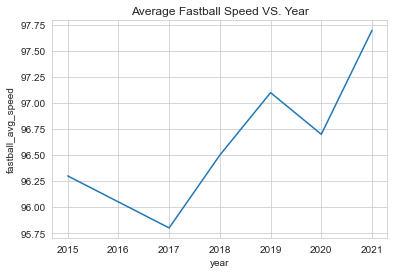

In [28]:
sns.lineplot(data=df_cole, 
             x='year', y='fastball_avg_speed').set(title='Average Fastball Speed VS. Year')


### Average Fastball Spinrate Over The Years

Similarly, while Cole's average fastball spinrate has also increased, his spinrate has seen an increase markedly since 2015. 

[Text(0.5, 1.0, 'Average Fastball Spinrate VS. Year')]

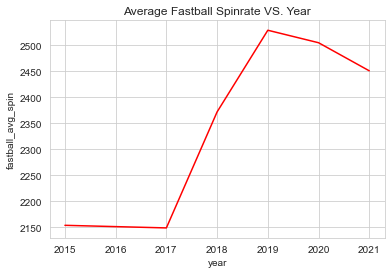

In [29]:
sns.lineplot(data=df_cole, 
             x='year', y='fastball_avg_spin', 
             color = 'red').set(title='Average Fastball Spinrate VS. Year')

We notice from both graphs that there is a clear uptick in Gerrit Cole's average fastball speed and spinrates since 2015. We know that Cole was traded from the Pittsburgh Pirates to the Houston Astros in 2017 and has seen greater success in his career since that point. It has been speculated that he has altered his pitching ability through the use of foreign substances applied to the baseball, and as a result, has seen greater speed and spinrates on his fastball. 


### Earned Run Average 

While Cole's spinrate and fastball speed increased over the years, does his spinrate and fastball speed correlate directly with his earned run average (ERA)? Earned run average represents the number of earned runs a pitcher allows per nine innings - with earned runs being any runs that scored without the aid of an error or a passed ball. ERA is one of the most commonly accepted statistical tool for evaluating pitchers.



Lets plot a line graph that will help visualize Gerrit Cole's earned run average since 2015. A lower ERA indicates that Cole does not allow many runs to score which is ideal. We see now that after Cole's arrival to the Houston Astros, his ERA saw a significant decline from his earlier career statistics. 

[Text(0.5, 1.0, 'Earned Run Average VS. Year')]

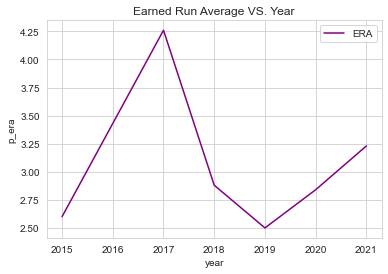

In [30]:
# plot ERA
sns.lineplot(data=df_cole, 
             x= df_cole['year'], y= df_cole['p_era'], 
             label = 'ERA', color = 'purple').set(title='Earned Run Average VS. Year')

## Gerrit Cole's Performance in 2021

While we can certainly observe that Gerrit Cole's fastball speed and spinrate have increased over the years, lets take a closer look at 2021 up to this point.

### The New Dataset

I will need a new dataset to track Cole's performance specifically for 2021. The dataset I will be using is retrieved once again from [Baseball Savant](https://baseballsavant.mlb.com/). The data gathered is a csv (comma separated values) file which have been filtered to include Cole's games played in 2021 and average spin-rate, speed, and various other performance metrics that can be used to determine his overall success. 

In [31]:
#create a new dataframe for Gerrit Cole's 2021 statistics only
cole_2021 = pd.read_csv('2021_cole.csv')
cole_2021.head()

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,129,543037,"Cole, Gerrit",2021-07-10,129,100.0,0.103,0.000,0.176,0.103,0.130,0.175,0.141,3,29,87.2,25.7,2301,92.7,92.47,13,54,75,-0.2,6.44,108,149,117,148,292,327,287
1,116,543037,"Cole, Gerrit",2021-09-01,116,100.0,0.160,0.080,0.400,0.240,0.170,0.127,0.130,4,25,81.3,3.5,2400,93.6,93.91,32,60,56,0.3,6.52,115,152,119,148,299,316,289
2,111,543037,"Cole, Gerrit",2021-04-24,111,100.0,0.125,0.125,0.231,0.250,0.154,0.244,0.198,3,24,90.1,18.5,2525,92.5,92.84,15,55,56,0.3,6.56,114,161,119,149,286,323,292
3,109,543037,"Cole, Gerrit",2021-04-18,109,100.0,0.217,0.043,0.357,0.261,0.219,0.204,0.184,5,23,92.4,17.6,2487,92.4,92.56,18,55,54,0.2,6.56,112,157,116,150,307,333,285
4,108,543037,"Cole, Gerrit",2021-09-14,108,100.0,0.211,0.105,0.333,0.316,0.287,0.235,0.167,4,19,80.3,17.6,2517,93.1,93.31,14,42,66,0.2,6.58,113,151,128,143,290,328,291


In [32]:
#what are the columns included in our data?
cole_2021.columns

Index(['pitches', 'player_id', 'player_name', 'game_date', 'total_pitches',
       'pitch_percent', 'ba', 'iso', 'babip', 'slg', 'woba', 'xwoba', 'xba',
       'hits', 'abs', 'launch_speed', 'launch_angle', 'spin_rate', 'velocity',
       'effective_speed', 'whiffs', 'swings', 'takes', 'eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance'],
      dtype='object')

In [33]:
#how many columns and rows do we have?
print('We have', cole_2021.shape, 'rows & columns')

We have (30, 32) rows & columns


In [34]:
#display all columns
pd.set_option('display.max_columns', 32)
cole_2021

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,129,543037,"Cole, Gerrit",2021-07-10,129,100.0,0.103,0.000,0.176,0.103,0.130,0.175,0.141,3,29,87.2,25.7,2301,92.7,92.47,13,54,75,-0.2,6.44,108,149,117,148,292,327,287
1,116,543037,"Cole, Gerrit",2021-09-01,116,100.0,0.160,0.080,0.400,0.240,0.170,0.127,0.130,4,25,81.3,3.5,2400,93.6,93.91,32,60,56,0.3,6.52,115,152,119,148,299,316,289
2,111,543037,"Cole, Gerrit",2021-04-24,111,100.0,0.125,0.125,0.231,0.250,0.154,0.244,0.198,3,24,90.1,18.5,2525,92.5,92.84,15,55,56,0.3,6.56,114,161,119,149,286,323,292
3,109,543037,"Cole, Gerrit",2021-04-18,109,100.0,0.217,0.043,0.357,0.261,0.219,0.204,0.184,5,23,92.4,17.6,2487,92.4,92.56,18,55,54,0.2,6.56,112,157,116,150,307,333,285
4,108,543037,"Cole, Gerrit",2021-09-14,108,100.0,0.211,0.105,0.333,0.316,0.287,0.235,0.167,4,19,80.3,17.6,2517,93.1,93.31,14,42,66,0.2,6.58,113,151,128,143,290,328,291
5,108,543037,"Cole, Gerrit",2021-06-22,108,100.0,0.125,0.125,0.118,0.250,0.216,0.262,0.175,3,24,83.0,5.5,2342,91.3,91.65,14,56,52,0.3,6.50,112,153,119,148,303,330,284
6,106,543037,"Cole, Gerrit",2021-05-12,106,100.0,0.148,0.074,0.267,0.222,0.157,0.079,0.077,4,27,80.4,6.9,2475,91.5,89.38,24,51,55,-2.1,6.84,111,155,112,153,300,328,293
7,105,543037,"Cole, Gerrit",2021-07-29,105,100.0,0.273,0.182,0.417,0.455,0.326,0.283,0.192,6,22,90.1,5.7,2302,93.9,94.20,23,55,50,0.3,6.74,112,162,112,150,293,332,294
8,104,543037,"Cole, Gerrit",2021-07-23,104,100.0,0.300,0.250,0.417,0.550,0.370,0.385,0.281,6,20,91.1,17.7,2413,92.5,92.69,16,47,57,0.2,6.37,112,157,118,147,276,320,303
9,104,543037,"Cole, Gerrit",2021-09-19,104,100.0,0.400,0.240,0.500,0.640,0.461,0.368,0.273,10,25,84.1,8.0,2512,91.4,91.51,16,59,45,0.1,6.45,108,149,116,146,294,328,286


We only care about key performance metrics for Cole in 2021. I will drop some excess columns. 

In [35]:
#drop excess columns
cole_2021.drop(columns=['eff_min_vel',
       'release_extension', 'pos3_int_start_distance',
       'pos4_int_start_distance', 'pos5_int_start_distance',
       'pos6_int_start_distance', 'pos7_int_start_distance',
       'pos8_int_start_distance', 'pos9_int_start_distance'], inplace = True)


In [50]:
# summary statistics of Cole's 2021 season for reference
cole_2021.describe()

,pitches,player_id,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,whiff_percent
count,30.000000,30.0,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,98.966667,543037.0,98.966667,100.0,0.227933,0.151933,0.316700,0.380000,0.278400,0.276133,0.2129,5.033333,22.566667,88.703333,12.706667,2435.20000,92.286667,92.409000,15.433333,48.400000,50.566667,31.767361
std,11.099808,0.0,11.099808,0.0,0.084262,0.128310,0.113501,0.193681,0.107971,0.099087,0.0666,1.771096,3.212941,5.212219,9.186682,88.83592,0.925029,1.130164,5.341337,6.584203,8.011558,9.194304
min,70.000000,543037.0,70.000000,100.0,0.100000,0.000000,0.091000,0.103000,0.130000,0.079000,0.0770,2.000000,14.000000,80.300000,-9.400000,2294.00000,90.500000,89.380000,7.000000,39.000000,30.000000,16.000000
25%,94.000000,543037.0,94.000000,100.0,0.160000,0.043000,0.254250,0.250000,0.181500,0.208750,0.1675,4.000000,21.000000,84.350000,6.000000,2348.25000,91.525000,91.690000,13.000000,43.000000,47.000000,25.893364
50%,97.000000,543037.0,97.000000,100.0,0.217000,0.134000,0.333000,0.310000,0.267000,0.272000,0.2090,5.000000,23.000000,90.100000,12.550000,2428.00000,92.450000,92.515000,15.000000,47.000000,49.500000,30.294850
75%,104.750000,543037.0,104.750000,100.0,0.270000,0.233500,0.400000,0.473000,0.330500,0.355000,0.2720,6.000000,24.000000,92.550000,17.675000,2515.00000,92.800000,93.050000,16.000000,55.000000,55.000000,35.961752
max,129.000000,543037.0,129.000000,100.0,0.400000,0.455000,0.556000,0.818000,0.486000,0.458000,0.3350,10.000000,29.000000,98.500000,30.500000,2573.00000,93.900000,94.250000,32.000000,60.000000,75.000000,53.333333


We have to do some minor data cleaning here as the data retrieved is not sorted by game_date in descending order. We can use the `.sort_values` to sort. 

In [36]:
cole_2021 = cole_2021.sort_values(by=['game_date'])
cole_2021

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes
14,97,543037,"Cole, Gerrit",2021-04-01,97,100.0,0.238,0.143,0.333,0.381,0.300,0.318,0.233,5,21,98.5,24.2,2491,91.3,91.67,13,47,50
15,97,543037,"Cole, Gerrit",2021-04-06,97,100.0,0.160,0.040,0.333,0.200,0.155,0.097,0.102,4,25,85.1,29.7,2573,90.5,90.30,26,53,44
13,98,543037,"Cole, Gerrit",2021-04-12,98,100.0,0.143,0.000,0.231,0.143,0.151,0.168,0.142,3,21,94.3,13.9,2539,91.4,91.55,13,43,55
3,109,543037,"Cole, Gerrit",2021-04-18,109,100.0,0.217,0.043,0.357,0.261,0.219,0.204,0.184,5,23,92.4,17.6,2487,92.4,92.56,18,55,54
2,111,543037,"Cole, Gerrit",2021-04-24,111,100.0,0.125,0.125,0.231,0.250,0.154,0.244,0.198,3,24,90.1,18.5,2525,92.5,92.84,15,55,56
27,87,543037,"Cole, Gerrit",2021-04-30,87,100.0,0.190,0.000,0.444,0.190,0.167,0.158,0.152,4,21,91.3,16.0,2540,90.5,90.73,21,44,43
17,97,543037,"Cole, Gerrit",2021-05-06,97,100.0,0.208,0.250,0.167,0.458,0.277,0.348,0.277,5,24,85.7,11.2,2546,91.6,91.75,8,50,47
6,106,543037,"Cole, Gerrit",2021-05-12,106,100.0,0.148,0.074,0.267,0.222,0.157,0.079,0.077,4,27,80.4,6.9,2475,91.5,89.38,24,51,55
26,89,543037,"Cole, Gerrit",2021-05-17,89,100.0,0.333,0.429,0.417,0.762,0.473,0.406,0.286,7,21,96.5,21.4,2495,92.1,92.15,15,41,48
20,95,543037,"Cole, Gerrit",2021-05-22,95,100.0,0.182,0.000,0.267,0.182,0.224,0.244,0.193,4,22,88.3,-9.4,2543,92.8,92.95,11,41,54


The data now appears to be sorted from Gerrit Cole's first start and in ascending (most recent) order.  

## Spinrate Per Game (2021)

Now that Cole's game_dates have been sorted from earliest start to most recent, lets perform some graphical analysis of his performance metrics. We notice right away that there is generally a consistent fluctuation around 2500 RPM in average spinrate during his starts before June 2021. Since early June 2021, Cole's spinrate has since dropped to well below 2500 RPMs. 


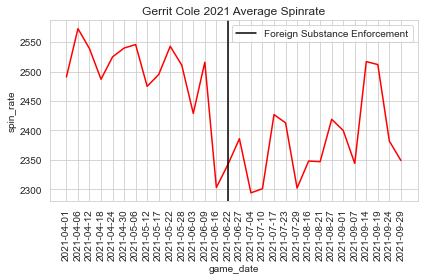

In [37]:
sns.lineplot(
    data=cole_2021, 
    x= 'game_date', 
    y= 'spin_rate', 
    color = 'red'
).set(title='Gerrit Cole 2021 Average Spinrate')

date = '2021-06-22'

plt.axvline(date, color = 'black', label = 'Foreign Substance Enforcement')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


It was around the time of late June 2021 that MLB had announced they would be checking pitchers for foreign substances. Many have speculated this is the primary reason we see such a dip in Cole's spin rate and is evidenced as such in games after June. We do see a spike in average spinrate in September which may suggest Cole could be adjusting to the MLB regulations. 

However, does the drop in spinrate necessarily translate in terms of his overall performance such as opponent batting average or average speed of his pitches? 

## Opponent Batting Average Per Game (2021)

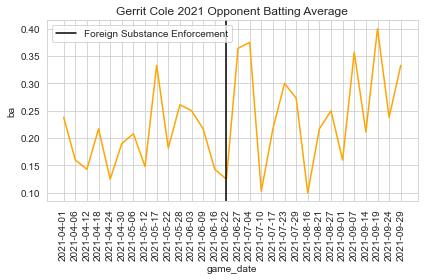

In [38]:
sns.lineplot(
    data=cole_2021, 
    x= 'game_date', 
    y= 'ba', 
    color = 'orange'
).set(title='Gerrit Cole 2021 Opponent Batting Average')

plt.axvline(date, color = 'black', label = 'Foreign Substance Enforcement')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


I noticed that opponents batting averages against Cole saw a sharp increase approximately around the time MLB began checking pitchers for foreign substances. Particularly, the games held on 6/27/2021 and 7/4/2021 yielded surprisingly sharp increases in the opponent batting average immediately after MLB began checking pitchers. 

Filtering the dates, we see that on 6/27/2021 and 7/4/2021, opponents were batting 0.364 and 0.375 against Cole, respectively.  

In [39]:
#creates a dataframe filter where we select only game date of '2021-06-27' and batting average column, 'ba'
cole_2021.loc[cole_2021['game_date'] == '2021-06-27', 'ba']

25    0.364
Name: ba, dtype: float64

In [40]:
#creates a dataframe filter where we select only game date of '2021-07-04' and batting average column, 'ba'
cole_2021.loc[cole_2021['game_date'] == '2021-07-04', 'ba']

28    0.375
Name: ba, dtype: float64

## Opponent Slugging Per Game (2021)

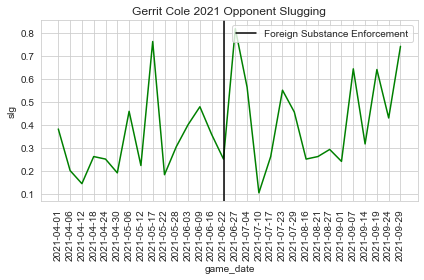

In [41]:
sns.lineplot(
    data=cole_2021, 
    x= 'game_date', 
    y= 'slg', 
    color = 'green'
).set(title='Gerrit Cole 2021 Opponent Slugging')

plt.axvline(date, color = 'black', label = 'Foreign Substance Enforcement')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Continuing with analyzing Cole's performance against batters, we see that Cole's opponent slugging has also increased gradually in the second half of the season and after June. This may suggest that hitters were effectively seeing Cole's pitches better and thus producing better against Cole. 

## Average Velocity (Speed) Per Game (2021)

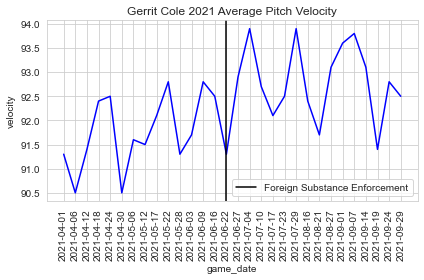

In [42]:
sns.lineplot(
    data=cole_2021, 
    x= 'game_date', 
    y= 'velocity', 
    color = 'blue'
).set(title='Gerrit Cole 2021 Average Pitch Velocity')

plt.axvline(date, color = 'black', label = 'Foreign Substance Enforcement')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


While we see that Cole's spinrate has taken a dive since June 2021, we instead notice that Cole's average pitch velocity has generally increased. While this can imply that Cole is throwing harder/faster, this can also imply that Cole is relying more on his fastball than his off-speed pitches. 

Does throwing faster necessarily correlate positively to spinrate? Not necessarily as I will plot a correlation graph between Cole's average pitch speed and spinrate as shown below:

<Figure size 1800x1440 with 0 Axes>

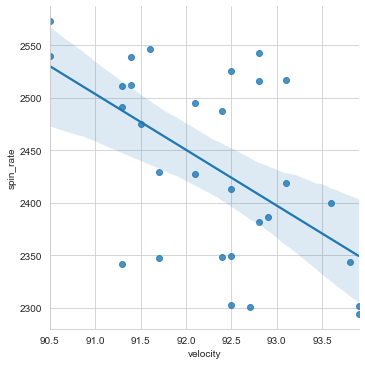

In [43]:
plt.figure(figsize = (25,20))
sns.lmplot(data=cole_2021, x='velocity', y= 'spin_rate')


### Whiff Percentage 

Additionally, I am interested in seeing Cole's whiff percentage as it is a statistic that is provided via StatCast. A whiff is considered a swing and a miss by a batter when a pitch is thrown. Generally, a higher whiff percentage indicates that the pitcher is pitching well and that the batter is having a hard time making contact. 

In order to determine whether there may be a relationship between whiff percentage and Cole's performance metrics, I have created a new column called `whiff_percent` that calculate Cole's whiff percentage on balls that were swung at by batters. 

In [44]:
#create a new column called whiff_percent by iterrating through each row using below calculation
for i, row in cole_2021.iterrows():
    cole_2021.loc[i,"whiff_percent"] = (row['whiffs'] / row['swings']) *100
        

In [45]:
cole_2021

,pitches,player_id,player_name,game_date,total_pitches,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,whiff_percent
14,97,543037,"Cole, Gerrit",2021-04-01,97,100.0,0.238,0.143,0.333,0.381,0.300,0.318,0.233,5,21,98.5,24.2,2491,91.3,91.67,13,47,50,27.659574
15,97,543037,"Cole, Gerrit",2021-04-06,97,100.0,0.160,0.040,0.333,0.200,0.155,0.097,0.102,4,25,85.1,29.7,2573,90.5,90.30,26,53,44,49.056604
13,98,543037,"Cole, Gerrit",2021-04-12,98,100.0,0.143,0.000,0.231,0.143,0.151,0.168,0.142,3,21,94.3,13.9,2539,91.4,91.55,13,43,55,30.232558
3,109,543037,"Cole, Gerrit",2021-04-18,109,100.0,0.217,0.043,0.357,0.261,0.219,0.204,0.184,5,23,92.4,17.6,2487,92.4,92.56,18,55,54,32.727273
2,111,543037,"Cole, Gerrit",2021-04-24,111,100.0,0.125,0.125,0.231,0.250,0.154,0.244,0.198,3,24,90.1,18.5,2525,92.5,92.84,15,55,56,27.272727
27,87,543037,"Cole, Gerrit",2021-04-30,87,100.0,0.190,0.000,0.444,0.190,0.167,0.158,0.152,4,21,91.3,16.0,2540,90.5,90.73,21,44,43,47.727273
17,97,543037,"Cole, Gerrit",2021-05-06,97,100.0,0.208,0.250,0.167,0.458,0.277,0.348,0.277,5,24,85.7,11.2,2546,91.6,91.75,8,50,47,16.000000
6,106,543037,"Cole, Gerrit",2021-05-12,106,100.0,0.148,0.074,0.267,0.222,0.157,0.079,0.077,4,27,80.4,6.9,2475,91.5,89.38,24,51,55,47.058824
26,89,543037,"Cole, Gerrit",2021-05-17,89,100.0,0.333,0.429,0.417,0.762,0.473,0.406,0.286,7,21,96.5,21.4,2495,92.1,92.15,15,41,48,36.585366
20,95,543037,"Cole, Gerrit",2021-05-22,95,100.0,0.182,0.000,0.267,0.182,0.224,0.244,0.193,4,22,88.3,-9.4,2543,92.8,92.95,11,41,54,26.829268


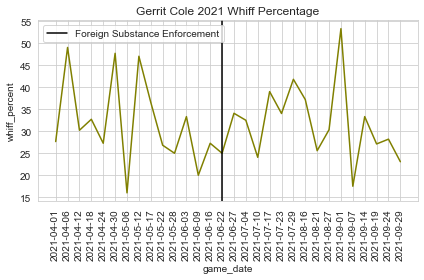

In [51]:
#plot Cole's whiff percent
sns.lineplot(
    data=cole_2021, 
    x= 'game_date', 
    y= 'whiff_percent', 
    color = 'olive'
).set(title='Gerrit Cole 2021 Whiff Percentage')

plt.axvline(date, color = 'black', label = 'Foreign Substance Enforcement')

plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We see that Cole's whiff percentage on pitches was generally hovering between 25% and 40% from June to August. There is an isolated spike in whiff percentage on the September 1 game (a game where Cole struck out 15 batters against the LAA) and generally, the whiff percentage does not exceed 45% thereafter. 

However, it is difficult to conclude at this time whether we can expect Cole's whiff percentage to continue to underperform after the ban on foreign substances on baseballs. 

# Conclusions

1. There is a slight correlation between average fastball speed and average fastball spinrate. However, there is no strong correlation between average pitch velocity and pitch spinrate. In general, throwing harder for breaking balls will result in a lower spinrate.  


2. MLB has seen an increase in pitchers allowing walks to batters between 2015 and 2021. In fact, 2021 saw a total of walks roughly equivalent to the 2017-2019 seasons. There is no strong indication that the crackdown on sticky substances has generated more or less walks. 

    * There is an indication that the game of baseball has seen a greater tendency for batters to walk. 
    
    
3. There is a noticeable rise in hit by pitches each season since 2015. 2021 in particular, saw the greatest amount of hit by pitches (2016 hbp) since 2015. 

    * Pitchers are throwing harder than ever and may be relying on the grip of the baseball for control. The rise in hit by pitches can be partially attributed with the crackdown on sticky substances and rise of hard throwers in baseball. 
    
    
4. There is evidence to suggest that the ban on foreign substances on baseballs in late June 2021 has impacted Gerrit Cole's performance. 

    * Since June 2021, Cole's average spinrate has decreased 
    * However, Cole's average fastball speed has increased; maybe compensating for his loss in spinrate. 
    